In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install chart-studio

In [4]:
#Constants
RAW_DATASET_PATH = '../../data/raw/SeoulBikeData_MP1.csv'

### Utility Methods

In [3]:
def get_range_for_column(dataframe, column_label):
    """
    Make sure the column given is in appropriate data type
    :param dataframe: `python.Dataframe` dataframe object
    :param column_label: the string label for the column
    :return: two values, first one being the min and the second one being the max
    """
    return dataframe[column_label].min(), dataframe[column_label].max()

In [4]:
def get_null_values_for_column(dataframe, column_label):
    """
    A utility function that returns the count of instances of a column which are null
    :param dataframe: `pandas.Dataframe` dataframe object
    :param column_label: the string label for the column
    :return: a positive integer indicating the number of instances with null values
    """
    return dataframe[column_label].isna().sum()

In [33]:
dataset = pd.read_csv(RAW_DATASET_PATH)

In [34]:
dataset

,Unnamed: 0,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,30/11/18,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,8756,30/11/18,764,20,NaN,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,8757,30/11/18,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,8758,30/11/18,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [41]:
dataset = dataset.drop('Unnamed: 0', axis='columns')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8260 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [42]:
dataset.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8260.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.877349,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.957556,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.500000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.750000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**Verify what's the first and last date value**

In [43]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format="%d/%m/%y")
end_date = dataset['Date'].max()
start_date = dataset['Date'].min()
print("Dates are from {} to {}".format(start_date, end_date))
print("Number of null fields {}".format(dataset['Date'].isna().sum()))

Dates are from 2017-12-01 00:00:00 to 2018-11-30 00:00:00
Number of null fields 0


**Verify data about the Rented Bike count Column**

In [44]:
min_rented_bike_count = dataset['Rented Bike Count'].min()
max_rented_bike_count = dataset['Rented Bike Count'].max()
print("Rented Bike count ranges from {} to {}".format(min_rented_bike_count, max_rented_bike_count))
print("Number of null fields {}".format(dataset['Rented Bike Count'].isna().sum()))

Rented Bike count ranges from 0 to 3556
Number of null fields 0


**Verify values for Temperature column**

In [45]:
min_temperature_celsius = dataset['Temperature(C)'].min()
max_temperature_celsius = dataset['Temperature(C)'].max()
print("Temperature ranges from {} degreec C to {} degrees C".format(min_temperature_celsius, max_temperature_celsius))
print("Number of null fields {}".format(dataset['Temperature(C)'].isna().sum()))

Temperature ranges from -17.5 degreec C to 39.4 degrees C
Number of null fields 500


**Verify values for Humidity column**

In [46]:
min_humidity, max_humidity = get_range_for_column(dataframe=dataset, column_label='Humidity(%)')
print("Humidity ranges from {}% to {}%".format(min_humidity, max_humidity))
print("Number of null values {}".format(get_null_values_for_column(dataframe=dataset, column_label='Humidity(%)')))

Humidity ranges from 0% to 98%
Number of null values 0


### Dataset description
Based on the above dataset we have about 8760 rows and about 14 attributes (ignoring the serial number)

1. Date - Format is dd/mm/yy starts from 01/12/17 and goes till 30/11/18, none of the values are null
2. Rented Bike count - Number denoting the number of bikes that were rented on any given day, ranges from 0 to 3556, none of the values are null
3. Hour - A categorical value ranging from 0 to 23 for each day, none of the values are null
4. Temperature - Temperature value in celsius, about 500 values are null, we might need to do some imputation for this. Ranges from -17.5 to 39.4, quite the range!
5. Humidity - A value denoting the amount of humidity in a given day, ranges from 0 to 98%. None of the rows are null
6. Wind speed - Number denoting wind speed in m/s. Ranges from 0 to 7.4
7. Visibility - The values*10 reveal the actual visibility in miles. Ranges from 270 meters to 20000 meters. None of the values are null
8. Dew Point Temperature - the temperature to which a parcel of moist air must be cooled at constant atmospheric pressure and constant water vapour content in order for saturation to occur. Ranges from -30.60 to 27.20 degrees celsius. None of the values are null
9. Solar radiation - MJ/m^2 (Mega Joule/m^2). None of the values are null, ranges from 0 to 3.52
10. Rainfall - In millimeters. None of the values are null. Ranges from 0 to 35mm
11. Snowfall - In centimeters. None of the values are null. Ranges from 0 to 8.8cm
12. Seasons - Categorical Variable. Values in (Winter, Spring, Summer, Autumn)
13. Holiday - Categorical Variable. Values in (Not Holiday, Holiday)
14. Functional day - Categorical Variable. Values in (Yes, No). Seen for each hour. None of the values are null

#### Questions to answer
1. Wherever the functional day is No we have no bikes on that day.

### Encoding of categorical fields


In [83]:
dataset_onehot = dataset.copy()
dataset_onehot = pd.get_dummies(dataset_onehot, columns=['Seasons', 'Holiday', 'Functioning Day'], prefix=['season', 'holiday', 'func_day'], prefix_sep='_')
dataset_onehot['sin_hour'] = dataset_onehot['Hour'].apply(lambda x: np.sin(2*np.pi*x/max(dataset_onehot['Hour'])))
dataset_onehot['sin_sq_hour'] = dataset_onehot['Hour'].apply(lambda x: np.sin(2*np.pi*x/max(dataset_onehot['Hour']))**2)
# dataset_onehot.drop(columns=['Seasons', 'Holiday', 'Functioning Day'], axis='columns', inplace=True)
# fig, ax = plt.subplots(figsize=(15, 12))
# sns.heatmap(dataset_onehot.corr(), ax=ax)
dataset_onehot

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),...,season_Autumn,season_Spring,season_Summer,season_Winter,holiday_Holiday,holiday_No Holiday,func_day_No,func_day_Yes,sin_hour,sin_sq_hour
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,0,0,0,1,0,1,0,1,0.000000e+00,0.000000e+00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,0,0,0,1,0,1,0,1,2.697968e-01,7.279030e-02
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,0,0,0,1,0,1,0,1,5.195840e-01,2.699675e-01
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,0,0,0,1,0,1,0,1,7.308360e-01,5.341212e-01
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,0,0,0,1,0,1,0,1,8.878852e-01,7.883402e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,...,1,0,0,0,0,1,0,1,-8.878852e-01,7.883402e-01
8756,2018-11-30,764,20,NaN,37,2.3,2000,-9.9,0.0,0.0,...,1,0,0,0,0,1,0,1,-7.308360e-01,5.341212e-01
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,...,1,0,0,0,0,1,0,1,-5.195840e-01,2.699675e-01
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,...,1,0,0,0,0,1,0,1,-2.697968e-01,7.279030e-02


<AxesSubplot:xlabel='sin_sq_hour', ylabel='Rented Bike Count'>

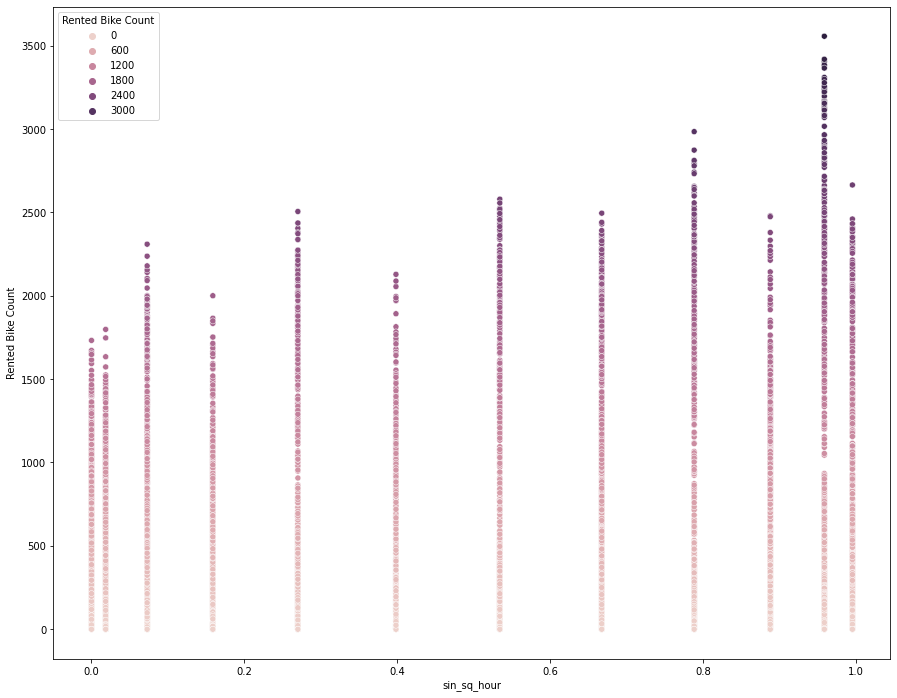

In [84]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.scatterplot(data=dataset_onehot, x="sin_sq_hour", y="Rented Bike Count", hue="Rented Bike Count", ax=ax)

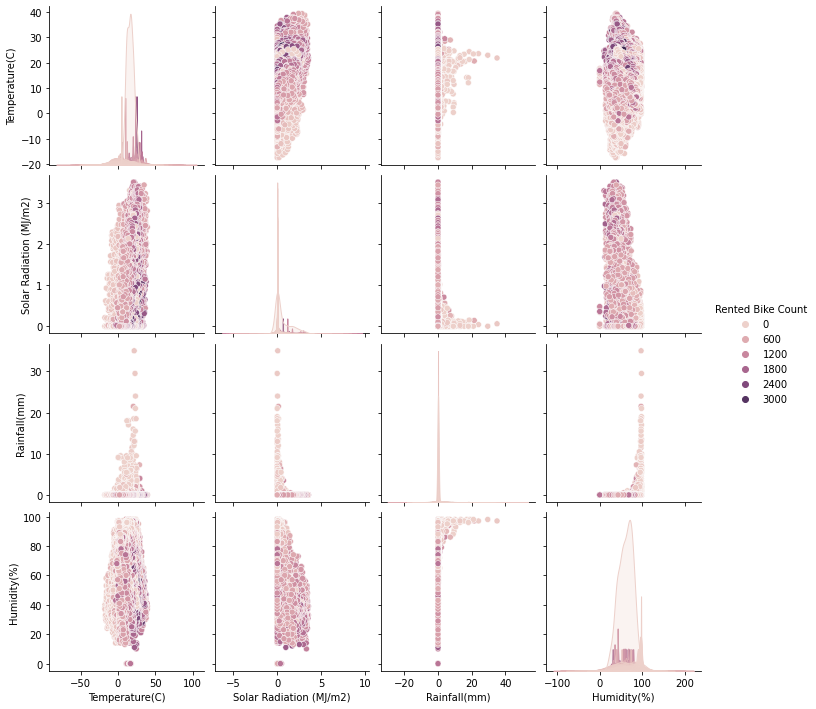

In [74]:
cols_needed = ['Temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Humidity(%)', 'Rented Bike Count']
sns.pairplot(data=dataset_onehot[cols_needed], hue='Rented Bike Count')

array([[<AxesSubplot:title={'center':'Rented Bike Count'}>,
        <AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temperature(C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>],
       [<AxesSubplot:title={'center':'Wind speed (m/s)'}>,
        <AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Dew point temperature(C)'}>,
        <AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>],
       [<AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>,
        <AxesSubplot:title={'center':'season_Autumn'}>,
        <AxesSubplot:title={'center':'season_Spring'}>],
       [<AxesSubplot:title={'center':'season_Summer'}>,
        <AxesSubplot:title={'center':'season_Winter'}>,
        <AxesSubplot:title={'center':'holiday_Holiday'}>,
        <AxesSubplot:title={'center':'holiday_No Holiday'}>],
       [<AxesSubplot:title={'center':'func_day_No'}>,
        <AxesSubplo

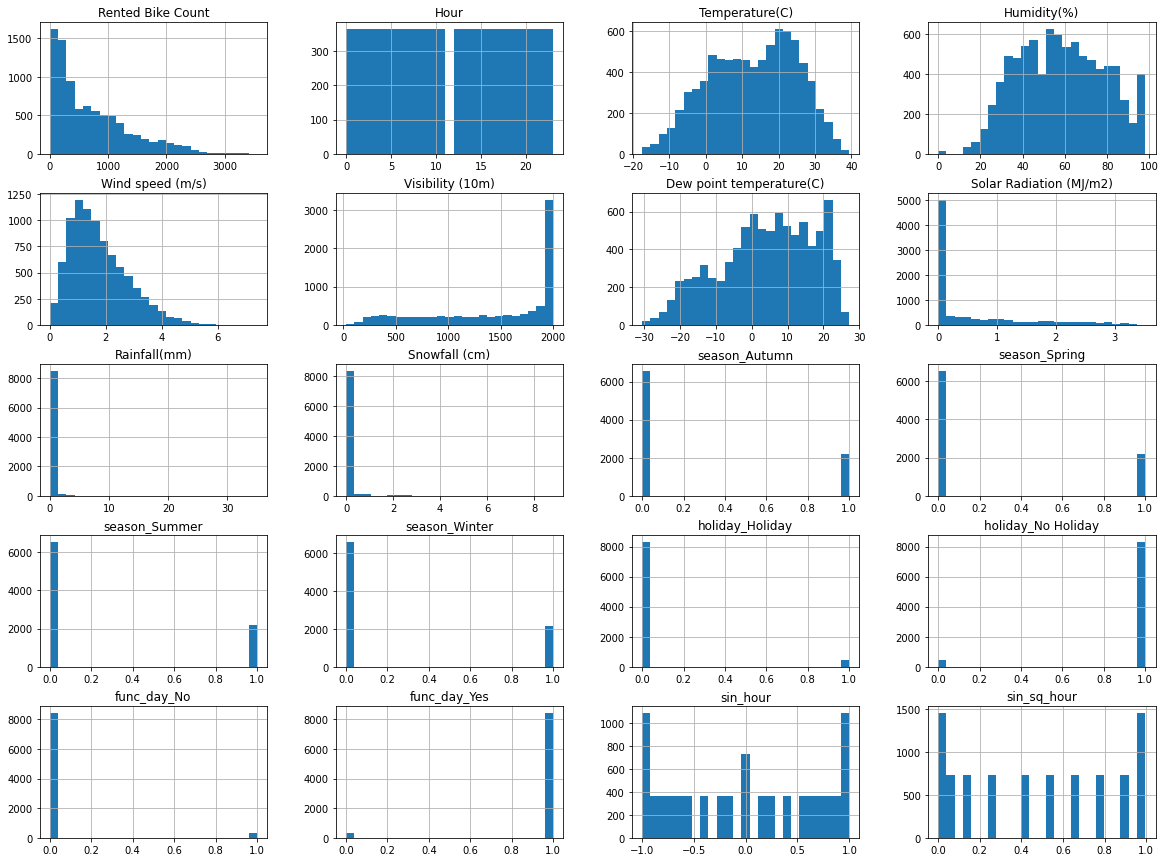

In [86]:
dataset_onehot.hist(bins=25, figsize=(20,15))

### Correlation of different numeric values with rented bike count

In [30]:
dataset[dataset['Functioning Day'] == 'No']['Snowfall (cm)'].unique()

array([0.])

Rented Bike Count           1.000000
Temperature(C)              0.540538
Hour                        0.410257
Dew point temperature(C)    0.379788
Unnamed: 0                  0.341894
Solar Radiation (MJ/m2)     0.261837
Visibility (10m)            0.199280
Wind speed (m/s)            0.121108
Rainfall(mm)               -0.123074
Snowfall (cm)              -0.141804
Humidity(%)                -0.199780
Name: Rented Bike Count, dtype: float64

**Interesting observations**

1. We know that the hour ranges from 0 to 23 and we see a good correlation between hour and rented bike count
2. Also, Temperature seems to be positively correlated with Rented Bike Count as well

### Plots